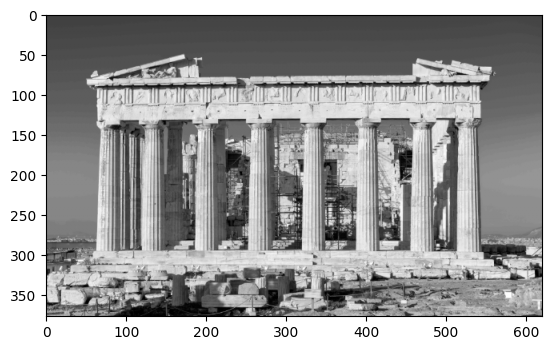

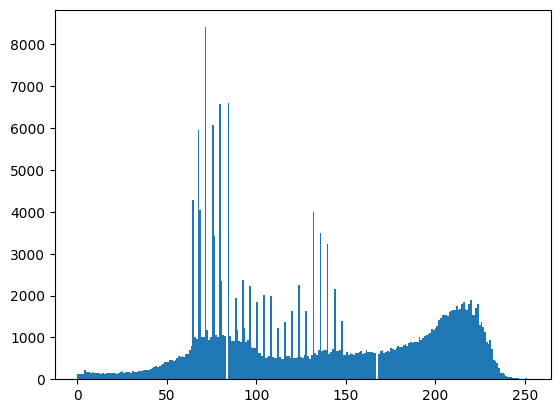

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

img_path = "data\parthenon.png"
img = np.array(Image.open(img_path).convert('L'))

plt.imshow(img, cmap='gray')

# Гистограмма
plt.figure()
plt.hist(img.ravel(), bins=255);

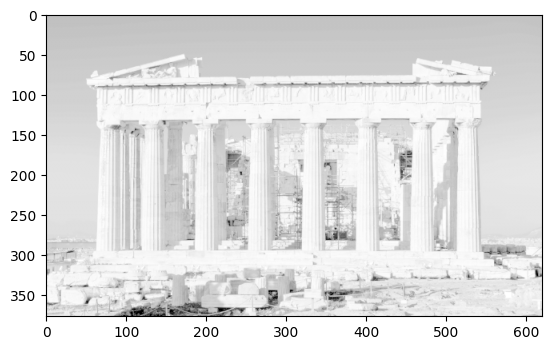

In [ ]:
img_transform = np.log10(1+img)
plt.imshow(img_transform, cmap='gray')

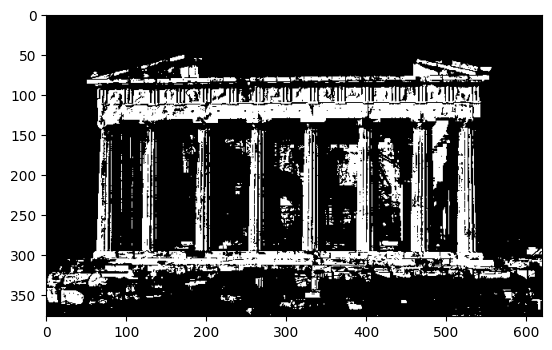

In [3]:
# Бинаризация 
mask = img > 200

plt.imshow(mask, cmap='gray')

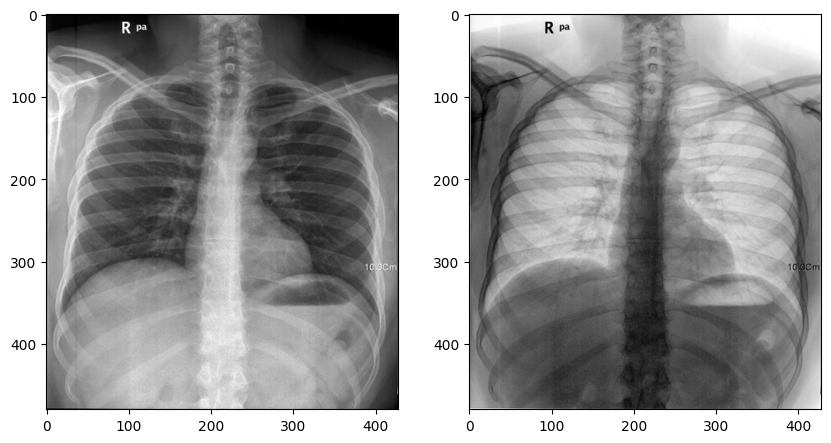

In [4]:
# Преобразование в негатив
img = np.array(Image.open("data\\roentgen.jpg").convert('L'))

fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(255 - img, cmap='gray')

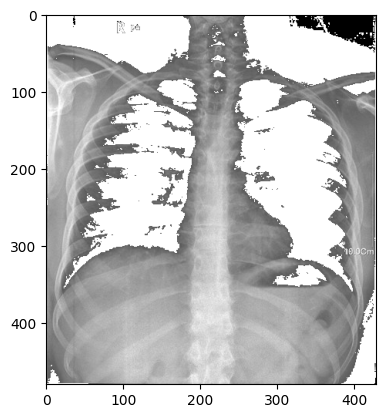

In [5]:
# Выделение диапазона яркостей
img = np.array(Image.open("data\\roentgen.jpg").convert('L'))
mask = np.nonzero((img > 0) & (img < 90))

img[mask[0], mask[1]] = 255

plt.imshow(img, cmap='gray')

In [6]:
# Битовые плоскости
# img = np.array(Image.open("data\\roentgen.jpg").convert('L'))
img = np.array(Image.open("data\\parthenon.png").convert('L'))
# Каждый пиксель преобразуем в 8 битовое число и каждый бит будем хранить на отдельном слое
bin_layers = np.zeros((8, img.shape[0], img.shape[1]), dtype=int)

for ii in range(img.shape[0]):
    for jj in range(img.shape[1]):
        num_binary = np.binary_repr(img[ii, jj], width=8)
        for position, num in enumerate(num_binary):
            bin_layers[position, ii, jj] = int(num)


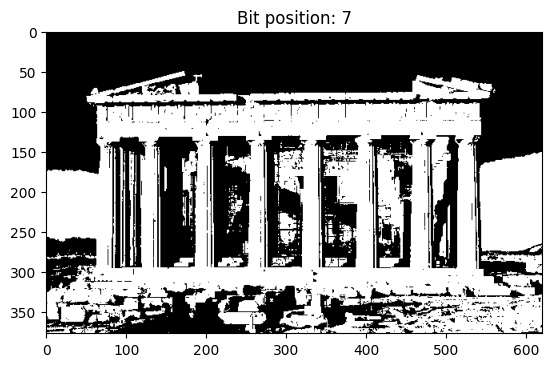

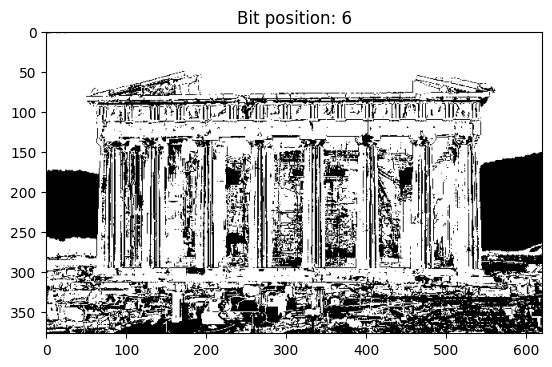

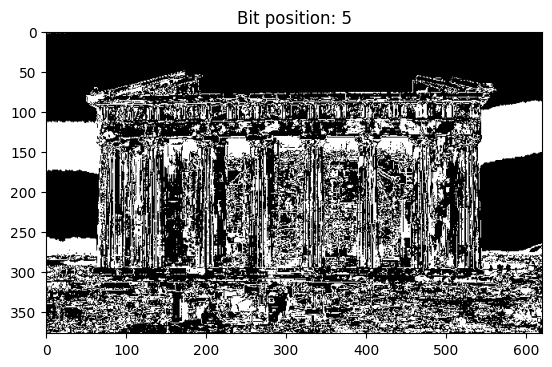

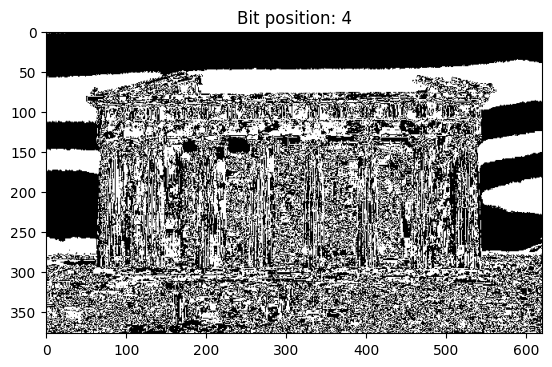

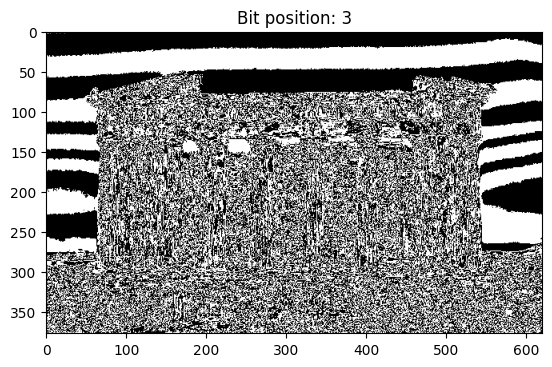

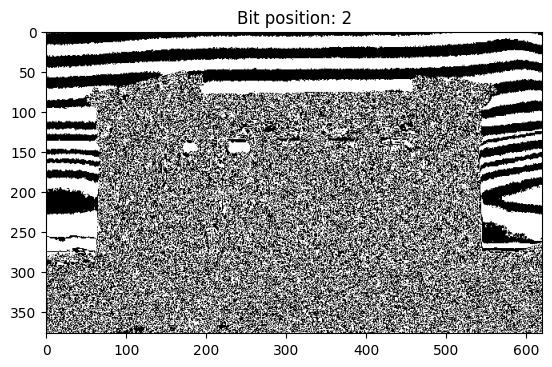

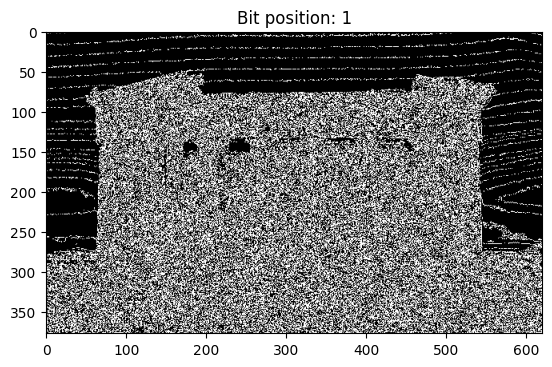

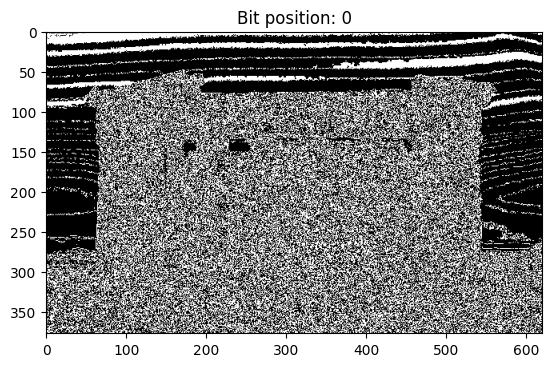

In [7]:
for ii in range(bin_layers.shape[0]):
    plt.figure()
    plt.imshow(bin_layers[ii, :, :], cmap='gray')
    plt.title(f'Bit position: {7-ii}')

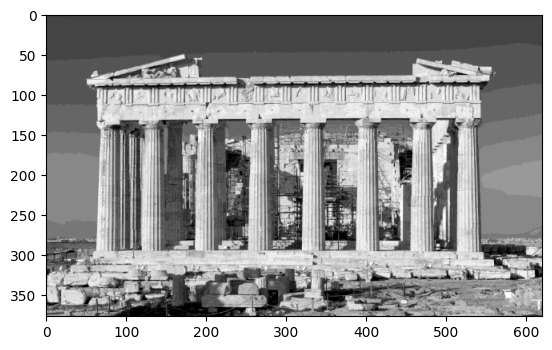

In [ ]:
# Конвертируем биты в каждой из плоскостей в целое число в соответствии с их позициями, затем суммируем, чтобы получить изображение
int_layers = np.zeros_like(bin_layers)
for ii in range(bin_layers.shape[0]):
    int_layers[ii, :, :] = bin_layers[ii, :, :] * 2**(7-ii)

# Количество слоев, которое требуется оставить
layers2keep = 4
img_reconstruct = np.sum(int_layers[:layers2keep, :, :], axis=0)

plt.imshow(img_reconstruct, cmap='gray')